In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid

In [48]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [49]:
df_org = pd.read_csv('vacation.csv', index_col='month')
df_org.head()

,vacation
month,
2004-01,98
2004-02,86
2004-03,82
2004-04,77
2004-05,81


<Axes: xlabel='month'>

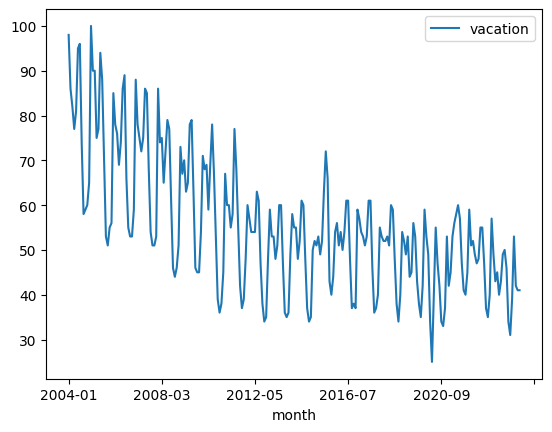

In [50]:
df_org.plot()

In [51]:
df = df_org.copy()

In [52]:
for i in range(12,0,-1):
  print(i)
  df['t='+str(i)] = df['vacation'].shift(i)

12
11
10
9
8
7
6
5
4
3
2
1


In [53]:
df

,vacation,t=12,t=11,t=10,t=9,t=8,t=7,t=6,t=5,t=4,t=3,t=2,t=1
month,,,,,,,,,,,,,
2004-01,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0
2004-03,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,86.0
2004-04,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,86.0,82.0
2004-05,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,86.0,82.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11,39,40.0,57.0,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0
2023-12,53,57.0,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0,39.0
2024-01,42,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0,39.0,53.0


In [54]:
df.dropna(inplace=True)

In [55]:
df

,vacation,t=12,t=11,t=10,t=9,t=8,t=7,t=6,t=5,t=4,t=3,t=2,t=1
month,,,,,,,,,,,,,
2005-01,100,98.0,86.0,82.0,77.0,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0
2005-02,90,86.0,82.0,77.0,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0,100.0
2005-03,90,82.0,77.0,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0,100.0,90.0
2005-04,75,77.0,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0,100.0,90.0,90.0
2005-05,77,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0,100.0,90.0,90.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11,39,40.0,57.0,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0
2023-12,53,57.0,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0,39.0
2024-01,42,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0,39.0,53.0


In [56]:
X = df.iloc[:,1:].values
X

array([[ 98.,  86.,  82., ...,  59.,  60.,  65.],
       [ 86.,  82.,  77., ...,  60.,  65., 100.],
       [ 82.,  77.,  81., ...,  65., 100.,  90.],
       ...,
       [ 49.,  43.,  45., ...,  31.,  39.,  53.],
       [ 43.,  45.,  40., ...,  39.,  53.,  42.],
       [ 45.,  40.,  43., ...,  53.,  42.,  41.]])

In [57]:
y = df.iloc[:,0].values
y

array([100,  90,  90,  75,  77,  94,  88,  71,  53,  51,  55,  56,  85,
        78,  76,  69,  74,  86,  89,  66,  55,  53,  53,  59,  88,  78,
        75,  72,  75,  86,  85,  68,  54,  51,  51,  53,  86,  74,  75,
        65,  72,  79,  77,  61,  46,  44,  46,  51,  73,  67,  70,  63,
        65,  78,  79,  63,  46,  45,  45,  54,  71,  68,  69,  59,  69,
        78,  67,  53,  39,  36,  38,  45,  67,  60,  60,  55,  58,  77,
        68,  55,  42,  37,  39,  48,  60,  57,  54,  54,  54,  63,  61,
        47,  38,  34,  35,  48,  59,  53,  53,  48,  51,  60,  60,  47,
        36,  35,  36,  49,  58,  55,  55,  48,  52,  61,  60,  48,  37,
        34,  35,  50,  52,  51,  53,  49,  52,  63,  72,  66,  43,  40,
        44,  54,  56,  51,  54,  50,  54,  61,  61,  48,  37,  38,  37,
        59,  57,  54,  53,  51,  53,  61,  61,  46,  36,  37,  40,  55,
        53,  52,  52,  53,  51,  60,  59,  48,  38,  34,  40,  54,  52,
        49,  53,  44,  45,  56,  53,  43,  38,  35,  42,  59,  5

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
rfr = RandomForestRegressor(random_state=42, n_estimators=200, max_features=4)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=200, random_state=42)

In [60]:
train_predict = rfr.predict(X_train)
test_predict = rfr.predict(X_test)

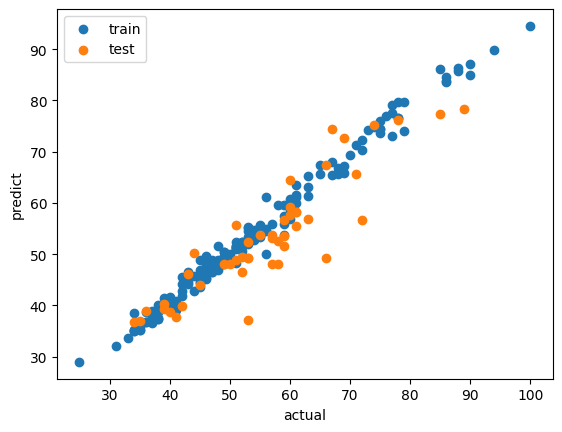

In [61]:
plt.scatter(y_train, train_predict, label='train')
plt.scatter(y_test, test_predict, label='test')
plt.xlabel('actual')
plt.ylabel('predict')
plt.legend()

In [62]:
from sklearn.metrics import mean_absolute_percentage_error

In [63]:
mean_absolute_percentage_error(y_train, train_predict) * 100

2.4659725935850703

In [64]:
mean_absolute_percentage_error(y_test, test_predict) * 100

7.819550405333334

In [65]:
def get_first_eval_batch(data, n):
  return data[-n:].reshape(-1,n)

In [66]:
train = df_org[:-12]
test = df_org[-12:]

In [67]:
n_lag = 12
test_prediction_rfr = []
current_batch = get_first_eval_batch(train['vacation'].values, n_lag)
for i in range(len(test)):
  current_pred = rfr.predict(current_batch)[0]
  test_prediction_rfr.append(current_pred)
  current_batch = np.append(current_batch[:,1:], current_pred).reshape(-1, n_lag)

In [68]:
test_prediction_rfr

[41.665,
 44.66,
 50.275,
 51.12,
 45.855,
 35.355,
 33.33,
 40.31,
 52.69,
 44.98,
 40.945,
 38.735]

<Axes: xlabel='month'>

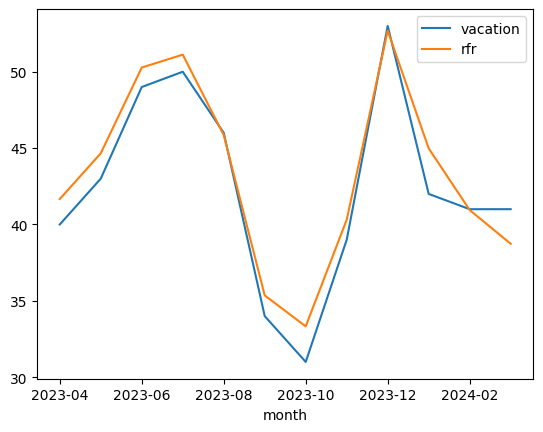

In [69]:
df_comp = test['vacation'].to_frame()
df_comp['rfr'] = test_prediction_rfr
df_comp.plot()

In [70]:
mean_absolute_percentage_error(test['vacation'], test_prediction_rfr) * 100

3.4482750978142263

# Lets construct arima model for this model

In [77]:
auto_arima(train, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1323.224, Time=2.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1699.884, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1401.546, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1568.004, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1698.015, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1326.265, Time=4.61 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1317.053, Time=4.58 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.80 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=1316.340, Time=4.73 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=1319.709, Time=4.21 sec
 ARIMA(2,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=4.92 sec
 ARIMA(3,1,2)(2,0,2)[12] intercept   : AIC=1320.467, Time=5.04 sec
 ARIMA(2,1,3)(2,0,2)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  231
Model:             SARIMAX(0, 1, 4)x(2, 0, [1, 2], 12)   Log Likelihood                -642.996
Date:                                 Thu, 25 Apr 2024   AIC                           1303.992
Time:                                         10:58:10   BIC                           1334.934
Sample:                                     01-01-2004   HQIC                          1316.473
                                          - 03-01-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3240      0.049     -6.639      0.000      -0.420      -0.228
ma.L2         -0.2669      0.075     -3.538      0.000      -0.415      -0.119
ma.L3         -0.1067      0.077     -1.380      0.168      -0.258       0.045
ma.L4         -0.1169      0.078     -1.492      0.136      -0.271       0.037
ar.S.L12       1.9190      0.063     30.358      0.000       1.795       2.043
ar.S.L24      -0.9257      0.062    -14.990      0.000      -1.047      -0.805
ma.S.L12      -1.6707      0.083    -20.096      0.000      -1.834      -1.508
ma.S.L24       0.7567      0.062     12.191      0.000       0.635       0.878
sigma2        13.1614      0.977     13.467      0.000      11.246      15.077
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                65.32
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.13
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
model = SARIMAX(train, order=(0,1,4), seasonal_order=(2,0,2,12))
fit_SARIMAX = model.fit()
fit_SARIMAX.summary()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                vacation   No. Observations:                  231
Model:             SARIMAX(0, 1, 4)x(2, 0, [1, 2], 12)   Log Likelihood                -642.996
Date:                                 Thu, 25 Apr 2024   AIC                           1303.992
Time:                                         10:59:07   BIC                           1334.934
Sample:                                     01-01-2004   HQIC                          1316.473
                                          - 03-01-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3240      0.049     -6.639      0.000      -0.420      -0.228
ma.L2         -0.2669      0.075     -3.538      0.000      -0.415      -0.119
ma.L3         -0.1067      0.077     -1.380      0.168      -0.258       0.045
ma.L4         -0.1169      0.078     -1.492      0.136      -0.271       0.037
ar.S.L12       1.9190      0.063     30.358      0.000       1.795       2.043
ar.S.L24      -0.9257      0.062    -14.990      0.000      -1.047      -0.805
ma.S.L12      -1.6707      0.083    -20.096      0.000      -1.834      -1.508
ma.S.L24       0.7567      0.062     12.191      0.000       0.635       0.878
sigma2        13.1614      0.977     13.467      0.000      11.246      15.077
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                65.32
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.13
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

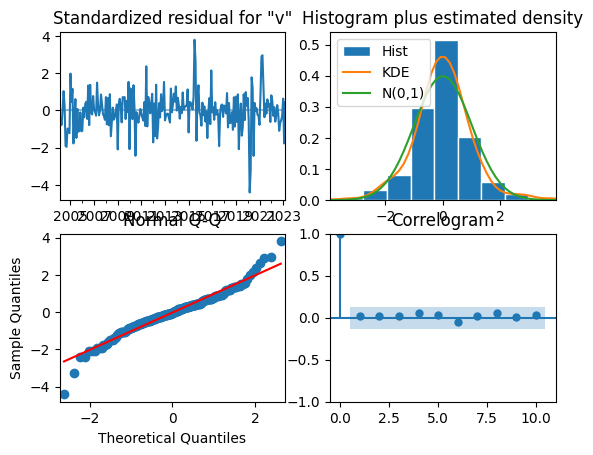

In [79]:
fit_SARIMAX.plot_diagnostics();

In [84]:
start = len(train)
end = len(train) + len(test) -1
prediction_SARIMA = fit_SARIMAX.predict(start, end).rename('SARIMA')

In [85]:
df_comp['SARIMA'] = prediction_SARIMA

<Axes: xlabel='month'>

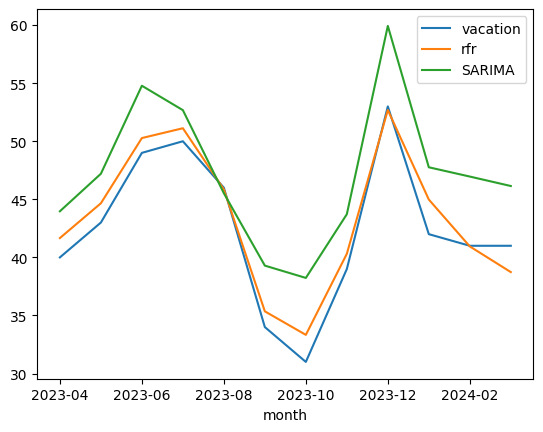

In [86]:
df_comp.plot()